In [35]:
import pandas as pd
import numpy as np
from statwolfml import Builder
from ACME import ACME 

In [36]:
dataset = pd.read_csv('dataset/exams.csv',sep=',')

In [37]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,high school,standard,none,50,56,50
1,male,group B,master's degree,standard,none,50,65,57
2,female,group B,bachelor's degree,standard,none,64,70,65
3,male,group C,associate's degree,free/reduced,none,44,45,41
4,female,group D,associate's degree,standard,none,58,78,80


In [38]:
qt_features = ['reading score','writing score']

In [39]:
ql_features = dataset.drop(columns=qt_features + ['math score']).columns.to_list()

In [76]:
ql_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [49]:
from data_science.modules.encoding import create as createENC
for qlf in ql_features:
    dataset[qlf] = createENC().label_encoder(dataset,column=qlf).dataframe()[qlf+'le'].values

In [50]:
dataset = dataset[ql_features + qt_features + ['math score']] 

In [ ]:
model= 'catboost_regressor'
build_model = Builder(model).feature_names(ql_features+qt_features).cat_features(ql_features).labels(['math score']).build()
train_model = build_model.train(dataset)

In [67]:
model = train_model.base_model()['model']

In [68]:
acme_rf = ACME(model, 'target', quantitative_features = qt_features ,qualitative_features = ql_features, K=20, task = 'r')

In [69]:
acme_rf = acme_rf.fit(dataset)

In [70]:
acme_rf.summary_plot()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


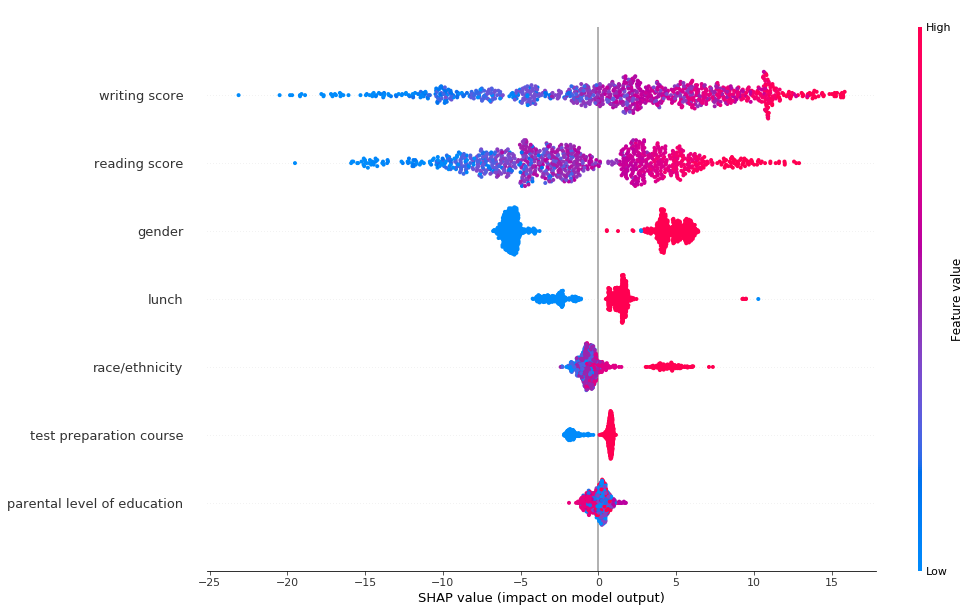

In [71]:
import shap
explainer = shap.TreeExplainer(train_model.base_model()['model'])
shap_values = explainer.shap_values(dataset.drop(columns='math score'))
shap.summary_plot(shap_values,dataset.drop(columns=['math score']),plot_size=(15,10))

In [72]:
acme_rf.bar_plot()

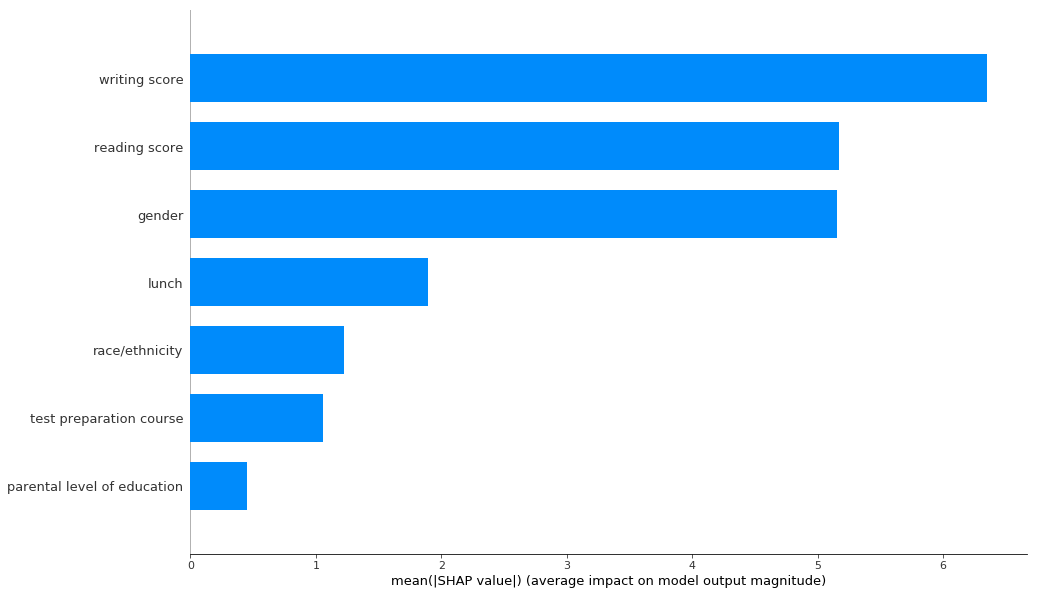

In [73]:
shap.summary_plot(shap_values,dataset.drop(columns=['math score']),plot_type='bar',plot_size=(15,10))